# 2021_01_18_Problema 1

En la siguiente tabla se presenta una muestra de entrenamiento no linealmente separable en $\mathbb{R}^2$ y los correspondientes multiplicadores de Lagrange óptimos obtenidos al entrenar una máquina de vectores soporte con esta muestra (y C=10):
$$\begin{array}{|l||rrrrrrrr|}
\hline
i &  1 &  2 &  3 &  4 &  5 &  6 & 7 & 8\\
\hline
x_{i1} &  1 &  3 &  4 &  4 &  3 &  1 & 3 & 2\\
x_{i2} &  4 &  2 &  1 &  3 &  1 &  2 & 3 & 3\\
\hline
\text{Clase} & +1 & +1 & -1 & -1 & -1 & +1& +1 & -1\\
\hline
\hline
\alpha^\star_i & ~0.0 & 10.0 & 0.0 & 6.0 & 6.4 & 2.4 & 10.0 & 10.0\\
\hline
\end{array}$$

Se pide:
1. Obtener la función discriminante lineal correspondiente y el valor del margen
2. Calcular las tolerancias de cada muestra de aprendizaje
3. Representar gráficamente la frontera lineal de separación entre clases, los márgenes y las muestras de entrenamiento,
  indicando cuáles son vectores soporte
4. Clasificar la muestra $(4,4)^t$

In [1]:
import numpy as np; np.set_printoptions(precision=4, suppress=True); from sklearn import svm
X = np.array([[1, 4], [3, 2], [4, 1], [4, 3], [3, 1], [1, 2], [3, 3], [2, 3]]).astype(np.float32)
y = np.array([1, 1, -1, -1, -1, 1, 1, -1]).astype(np.int32); N, D = X.shape
C = 10.0; clf = svm.SVC(C=C, kernel='linear').fit(X, y)
a = np.zeros(N); a[clf.support_] = clf.dual_coef_ * y[clf.support_]; print('alfa: ', a)
w = clf.coef_[0]; w0 = clf.intercept_ [0]; m = 2.0/np.linalg.norm(w); 
t = np.zeros(N); t[clf.support_] = 1.0 - y[clf.support_] * (clf.support_vectors_ @ w + w0)
print('w:', w, ' w0:', round(w0, 2), ' margen:', round(m, 4), ' t:', t)
Z = [[4, 4]]; print('Clase de', Z[0],':',clf.predict([[4, 4]])[0])

alfa:  [ 0.  10.   0.   6.   6.4  2.4 10.  10. ]
w: [-0.8  0.4]  w0: 1.0  margen: 2.2361  t: [ 0.   1.6  0.  -0.  -0.  -0.   1.2  1.6]
Clase de [4, 4] : -1


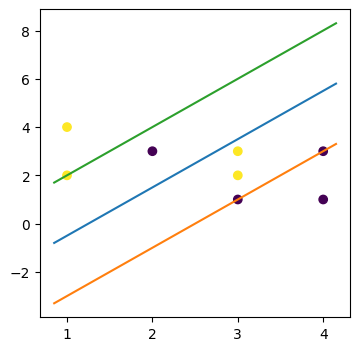

In [2]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(4, 4)); ax.scatter(*X.T, c=y)
x0 = np.linspace(*ax.get_xlim()); x1 = (-w[0]*x0 - w0)/w[1]
ax.plot(x0, x1, x0, x1 - 1/w[1], x0, x1 + 1/w[1]);
